<a href="https://colab.research.google.com/github/nandinib1999/dance-form-classification/blob/main/DanceFormsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem:** **Transfer learning**

Deep Learning is awesome, it has given wings to computer vision and object
detection/classification. However you need a lot of data to train a good detection model
which may not be readily available. Show use the use of transfer learning to train a model on
less data (<1000 images) and still getting good results (>80% accuracy) to demonstrate use
of transfer learning. You are free to pick a model of your choice and dataset of your choice.
(just don’t pick dataset which is already used in initial training) 

## **Solution**

For the above task, I have selected the task of predicting indian dance forms. This task was released by HackerEarth ([Click Here](https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-identify-dance-form/)) and has a very small training dataset - only 364 training images in total. 

India is a culturally rich country  where almost every state has its own language, cuisine, and dance forms. However, identifying them with just images is a difficult task.

The given dataset has the following 8 classes:

- Manipuri
- Bharatanatyam
- Odissi
- Kathakali
- Kathak
- Sattriya
- Kuchipudi
- Mohiniyattam

In [ ]:
!git clone "https://github.com/nandinib1999/dance-form-classification"

Cloning into 'dance-form-classification'...
remote: Enumerating objects: 2007, done.
remote: Counting objects: 100% (2007/2007), done.
remote: Compressing objects: 100% (2002/2002), done.
remote: Total 2007 (delta 9), reused 1997 (delta 5), pack-reused 0
Receiving objects: 100% (2007/2007), 55.82 MiB | 43.64 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/content/dance-form-classification')

In [ ]:
original_train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Original Training Dataset ", original_train.shape)
print("Test Dataset ", test.shape)

Original Training Dataset  (364, 2)
Test Dataset  (156, 1)


As you can see the number of images in training dataset is very less that's why we will be using the technique of image augmentation to generate more variations of images using the training dataset.

In the augment_images.py script, I have defined a few image transformation functions that will be applied to each of the image present in the training dataset. The transformed images will be saved in the training data folder and a new CSV file will be generated with image_file names and their respective labels.

In [ ]:
from augment_images import augment_train_images
augment_train_images('train')

value  0.565217103013989
(76, 250, 3)
5
value  0.10884150273005416
(177, 284, 3)
10
value  0.5087701304353129
(216, 183, 3)
15
value  0.566345858269512
(675, 480, 3)
20
value  0.11287287329575119
(368, 394, 3)
25
value  0.3603958176196169
(171, 225, 3)
30
value  0.2359605213126194
(272, 183, 3)
35
value  0.5143138981127909
(240, 183, 3)
40
value  0.49613747056900503
(132, 225, 3)
45
value  0.4581834357539736
(412, 320, 3)
50
value  0.5855314723644146
(152, 280, 3)
55
value  0.6144441467040026
(841, 1333, 3)
60
value  0.26330495638762047
(437, 700, 3)
65
value  0.2352478900186545
(400, 500, 3)
70
value  0.4740410581044202
(1431, 1550, 3)
75
value  0.4807303822037996
(139, 225, 3)
80
value  0.5305703199711952
(175, 199, 3)
85
value  0.18371574299351892
(203, 232, 3)
90
value  0.1891431741005804
(405, 720, 3)
95
value  0.48575528399009305
(145, 512, 3)
100
value  0.5193444272288393
(196, 189, 3)
105
value  0.23123482430577008
(306, 339, 3)
110
value  0.1012339960237571
(201, 220, 3)
115
v

In [ ]:
augmented_train = pd.read_csv('train_augmented.csv')
print(augmented_train.shape)
augmented_train.head()

(1820, 2)


,Image,target
0,aug_1_62.jpg,kathak
1,aug_0_136.jpg,bharatanatyam
2,aug_2_258.jpg,mohiniyattam
3,aug_3_204.jpg,kathakali
4,aug_0_472.jpg,odissi


Let us compare the count of each class in original dataset and augmented dataset.

In [ ]:
print("Original Dataset ")
print(original_train['target'].value_counts())
print("Augmented Dataset ")
print(augmented_train['target'].value_counts())

Original Dataset 
mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64
Augmented Dataset 
mohiniyattam     250
odissi           245
bharatanatyam    235
kathakali        235
kuchipudi        230
sattriya         225
kathak           220
manipuri         180
Name: target, dtype: int64


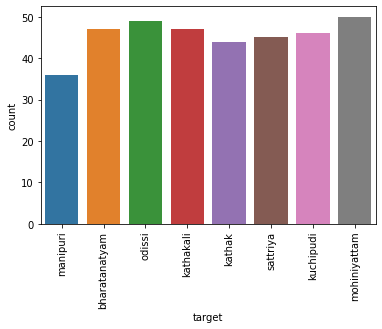

In [ ]:
plt.xticks(rotation ='vertical') 
ax = sns.countplot(x='target', data=original_train)

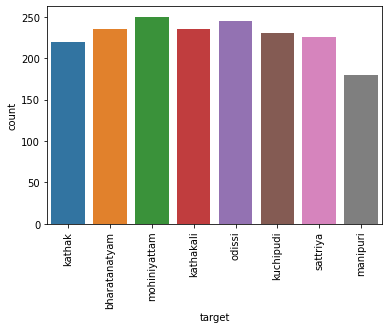

In [ ]:
plt.xticks(rotation ='vertical') 
ax = sns.countplot(x='target', data=augmented_train)

As you can see the number of images for each class has increased and hence, we are now ready to train our model. We will define two functions to load the training and test data respectively.

In [ ]:
IMG_SIZE = 224

def load_training_data(list_of_images, train):
  train_data = [] 
  train_label = [] 
  for image in list_of_images:
        image_path = os.path.join(train_dir, image)
        img_array = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        print(image_path)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        if image in list(train['Image']):
            class_label = train.loc[train['Image'] == image, 'target'].values[0]
            train_data.append(new_array)
            train_label.append(class_label)
  return train_data, train_label

In [ ]:
def load_test_data(list_of_images, test_dir):
    test_data = []
    for image in list_of_images:
        image_path = os.path.join(test_dir, image)
        test_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        resize_image = cv2.resize(test_image, (IMG_SIZE,IMG_SIZE))
        test_data.append(resize_image) 
            
    return test_data

In [ ]:
train_dir = os.path.join('train')
test_dir = os.path.join('test')

train_fnames = os.listdir(train_dir)
test_fnames = os.listdir(test_dir)

train_fnames = [x for x in train_fnames if x.endswith('.jpg')]
test_fnames = [x for x in test_fnames if x.endswith('.jpg')]

print("Training Images Count: ", len(train_fnames))
print("Test Images Count: ", len(test_fnames))

Training Images Count:  1820
Test Images Count:  156


In [ ]:
train_data, train_labels = load_training_data(train_fnames, augmented_train)

train/aug_1_362.jpg
train/aug_2_56.jpg
train/100.jpg
train/aug_0_249.jpg
train/321.jpg
train/409.jpg
train/254.jpg
train/aug_0_197.jpg
train/aug_3_131.jpg
train/aug_3_111.jpg
train/aug_2_133.jpg
train/aug_1_315.jpg
train/aug_3_231.jpg
train/aug_2_452.jpg
train/aug_2_262.jpg
train/aug_3_65.jpg
train/aug_0_404.jpg
train/aug_1_350.jpg
train/aug_1_94.jpg
train/aug_3_212.jpg
train/aug_2_371.jpg
train/91.jpg
train/369.jpg
train/aug_2_496.jpg
train/aug_3_201.jpg
train/aug_2_134.jpg
train/aug_2_281.jpg
train/aug_2_19.jpg
train/aug_0_480.jpg
train/aug_1_51.jpg
train/aug_0_123.jpg
train/aug_1_496.jpg
train/aug_0_469.jpg
train/aug_1_376.jpg
train/aug_2_409.jpg
train/aug_3_403.jpg
train/aug_2_348.jpg
train/aug_2_122.jpg
train/aug_2_85.jpg
train/135.jpg
train/aug_3_96.jpg
train/aug_3_453.jpg
train/aug_0_387.jpg
train/aug_1_501.jpg
train/aug_0_209.jpg
train/aug_2_137.jpg
train/aug_0_376.jpg
train/aug_1_368.jpg
train/aug_3_154.jpg
train/aug_3_512.jpg
train/aug_0_85.jpg
train/aug_1_201.jpg
train/aug_1

In [ ]:
# A simple utility function to visualize a sample of images
def show_sample(images, labels):
    plt.figure(figsize=(12,12))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(images[n])
        plt.title(labels[n].title())
        plt.axis('off')

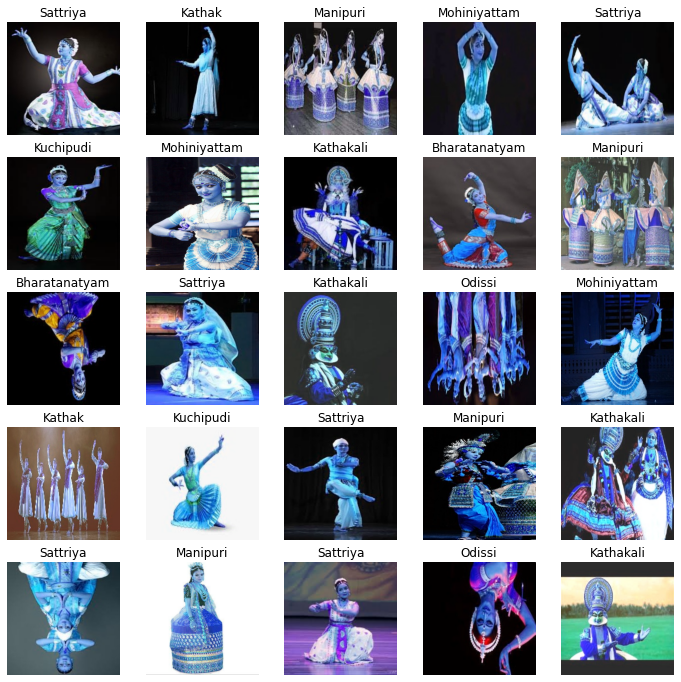

In [ ]:
show_sample(train_data, train_labels)

In [ ]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print("Shape of training data: ", train_data.shape)
print("Shape of training labels: ", train_labels.shape)

Shape of training data:  (1820, 224, 224, 3)
Shape of training labels:  (1820,)


We will encode the labels or classes using LabelEncoder as the labels are categorical.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels=le.fit_transform(train_labels)

In [ ]:
print("Shape of encoded labels: ", train_labels.shape)

Shape of encoded labels:  (1820,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

The encoded labels are then converted into vectors with the help of to_categorical() - a utility function provided by keras.utils.np_utils.

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 8)
y_val = to_categorical(y_val, num_classes = 8)

In [ ]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_val.shape)
print("Shape of test_y: ",y_val.shape)

Shape of test_x:  (1456, 224, 224, 3)
Shape of train_y:  (1456, 8)
Shape of test_x:  (364, 224, 224, 3)
Shape of test_y:  (364, 8)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.0


We will be normalizing the training and validation data using the ImageDataGenerators.

In [ ]:
import numpy as np
train_datagenerator = ImageDataGenerator(
        rescale=1. / 255
) 

val_datagenerator=ImageDataGenerator(
        rescale=1. / 255
)

train_datagenerator.fit(X_train)
val_datagenerator.fit(X_val)

For the task of Transfer Learning, I have selected VGG16 Model. The model is loaded along with its "imagenet" weights. I have further added the following layers: 
* Pooling Layers 
* 2 Dense layers 
* 2 Dropout layers (to avoid overfitting)  
* Dense layer with *'softmax'* activation to predict the classes.

In [ ]:
num_classes = 8

base_model = tf.keras.applications.VGG16(input_shape = (224,224,3), weights = 'imagenet',include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu',name='fc1')(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation='relu',name='fc2')(x)
x = Dropout(0.2)(x)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

model = Model(inputs=base_model.input, outputs=out)

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
epochs = 30
model.compile(optimizer='adam',
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=30, epochs=epochs, validation_data = (X_val,y_val))

Epoch 1/30
49/49 [==============================] - 9s 193ms/step - loss: 6.1237 - accuracy: 0.5007 - val_loss: 0.6682 - val_accuracy: 0.7555
Epoch 2/30
49/49 [==============================] - 8s 161ms/step - loss: 0.4630 - accuracy: 0.8434 - val_loss: 0.2886 - val_accuracy: 0.9093
Epoch 3/30
49/49 [==============================] - 8s 160ms/step - loss: 0.2100 - accuracy: 0.9272 - val_loss: 0.3963 - val_accuracy: 0.8874
Epoch 4/30
49/49 [==============================] - 8s 161ms/step - loss: 0.1375 - accuracy: 0.9567 - val_loss: 0.2577 - val_accuracy: 0.9368
Epoch 5/30
49/49 [==============================] - 8s 162ms/step - loss: 0.1660 - accuracy: 0.9471 - val_loss: 0.3737 - val_accuracy: 0.8984
Epoch 6/30
49/49 [==============================] - 8s 163ms/step - loss: 0.1050 - accuracy: 0.9657 - val_loss: 0.4325 - val_accuracy: 0.9176
Epoch 7/30
49/49 [==============================] - 8s 164ms/step - loss: 0.1122 - accuracy: 0.9684 - val_loss: 0.3831 - val_accuracy: 0.9038
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

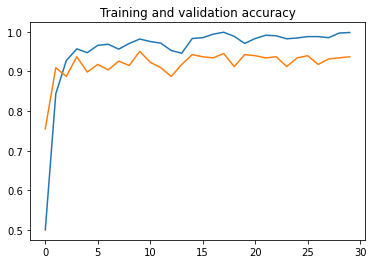

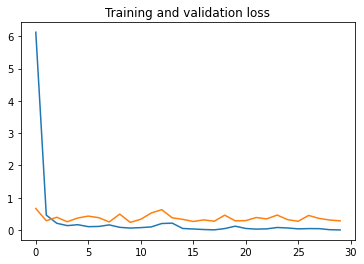

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(epochs)

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

The train model weights can be saved for future use.

In [ ]:
model.save_weights('dance-form.h5')

Let us load the test data and predict the dance form using the trained model.

In [ ]:
test_data = load_test_data(test_fnames, test_dir)

In [ ]:
test_data = np.array(test_data)
print("Test Data Shape: ", test_data.shape)

Test Data Shape:  (156, 224, 224, 3)


Predict the labels and convert it back into class names using inverse_transform() function of Label Encoder.

In [ ]:
labels = model.predict(test_data)
label = [np.argmax(i) for i in labels]
target = le.inverse_transform(label)

Take a look at some of the test images and their predicted labels.

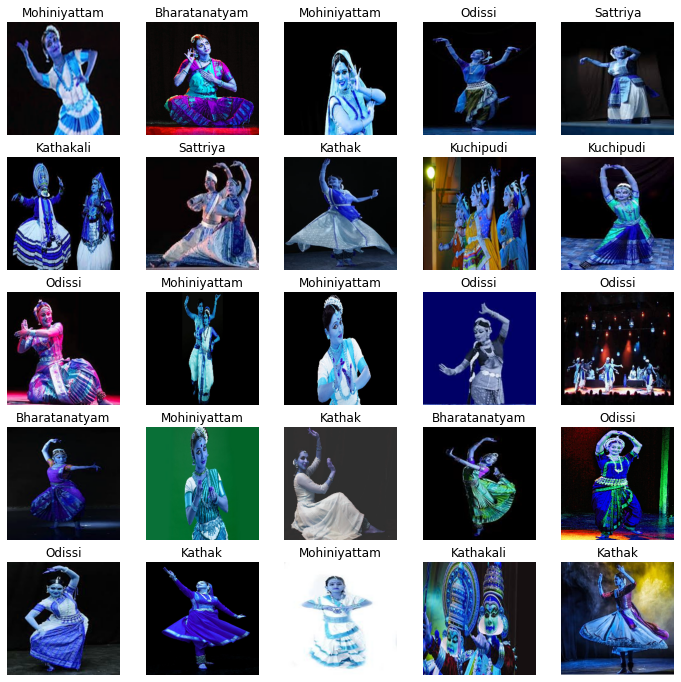

In [ ]:
show_sample(test_data, target)

In [ ]:
# This utility can be used to predict class of any new image
def predict_label_image(image_path, model):
  img = cv2.imread(image_path)
  resize_image = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
  resize_image = resize_image / 255
  input_img = np.array(resize_image)
  input_img = np.expand_dims(input_img, axis=0)
  y_pred = model(input_img)
  label_ind = np.argmax(y_pred)
  label = le.inverse_transform([label_ind])
  return label

## **Run Python Scripts**

In [ ]:
import os
os.chdir('/content/dance-form-classification')

In [ ]:
%%bash
python "train_model.py"

2020-10-23 17:46:18.334653: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2.3.0
Original Training Dataset  (364, 2)
Test Dataset  (156, 1)
Total Number of Images:  364
Writing  aug_0_100.jpg
Writing  aug_1_100.jpg
Writing  aug_2_100.jpg
Writing  aug_3_100.jpg
5
Writing  aug_0_321.jpg
Writing  aug_1_321.jpg
Writing  aug_2_321.jpg
Writing  aug_3_321.jpg
10
Writing  aug_0_409.jpg
Writing  aug_1_409.jpg
Writing  aug_2_409.jpg
Writing  aug_3_409.jpg
15
Writing  aug_0_254.jpg
Writing  aug_1_254.jpg
Writing  aug_2_254.jpg
Writing  aug_3_254.jpg
20
Writing  aug_0_91.jpg
Writing  aug_1_91.jpg
Writing  aug_2_91.jpg
Writing  aug_3_91.jpg
25
Writing  aug_0_369.jpg
Writing  aug_1_369.jpg
Writing  aug_2_369.jpg
Writing  aug_3_369.jpg
30
Writing  aug_0_135.jpg
Writing  aug_1_135.jpg
Writing  aug_2_135.jpg
Writing  aug_3_135.jpg
35
Writing  aug_0_99.jpg
Writing  aug_1_99.jpg
Writing  aug_2_99.jpg
Writing  aug_3_99.jpg
40
Writing  

In [ ]:
%%bash
python "/content/dance-form-classification/predict.py" --image_path="/content/dance-form-classification/test/238.jpg"

Predicted Class is  ['bharatanatyam']


2020-10-23 17:55:16.530192: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-23 17:55:17.818488: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-23 17:55:17.854843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-23 17:55:17.855440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-23 17:55:17.855510: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-23 17:55:17.857089: I tensorflow/stream_executor/platform/default